## Data Story Telling Exercise

#### Instructions:
1. Select a dataset
2. Pick your audience: executive, technical, or non-technical; and adjust your tone accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor.

#### Deliverables
1. The questions you asked
2. The trends you investigated
3. The resulting visualizations and conclusions

### Introduction

*The dataset below details includes airline prices in 2019 in South Asia* 

#### Question

1. Is there a proportional relationship between flight duration and flight prices? Assuming duration can represent distance here since it is not given (could be calculated)

##### Bonus:
2. Do flight prices fluctuate together? i.e. do all flights get more expensive or just certain legs at a time?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Airline Prices

In [3]:
df = pd.read_csv('data/flight_dataset.csv')

In [4]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [5]:
df.shape

(10683, 14)

In [6]:
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

*nice*

In [7]:
cols = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_hours', 'Dep_min', 'Arrival_hours', 'Arrival_min',
       'Duration_hours', 'Duration_min']

df.columns = [col.lower() for col in cols]

In [8]:
df.describe()

,total_stops,price,date,month,year,dep_hours,dep_min,arrival_hours,arrival_min,duration_hours,duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [9]:
df.groupby('airline')['price'].mean().sort_values()

airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: price, dtype: float64

In [10]:
df.airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [11]:
df.source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [12]:
df.destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

#### Convert Duration and Date

In [13]:
df['duration_total'] = df['duration_hours']*60 + df['duration_min']

In [14]:
df.head(2)

,airline,source,destination,total_stops,price,date,month,year,dep_hours,dep_min,arrival_hours,arrival_min,duration_hours,duration_min,duration_total
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,445


In [15]:
df.drop(columns=['duration_hours','duration_min'], inplace=True)

In [16]:
df.head()

,airline,source,destination,total_stops,price,date,month,year,dep_hours,dep_min,arrival_hours,arrival_min,duration_total
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


In [17]:
df['source_destination'] = df['source'] + ' ' + df['destination']
df.drop(columns=['source','destination'], inplace=True)

In [18]:
df.head(2)

,airline,total_stops,price,date,month,year,dep_hours,dep_min,arrival_hours,arrival_min,duration_total,source_destination
0,IndiGo,0,3897,24,3,2019,22,20,1,10,170,Banglore New Delhi
1,Air India,2,7662,1,5,2019,5,50,13,15,445,Kolkata Banglore


In [33]:
df.groupby('source_destination')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
source_destination,,,,,,,,
Banglore Delhi,1265.0,5143.918577,1346.487105,3257.0,4030.0,4823.0,5911.0,8541.0
Banglore New Delhi,932.0,11917.716738,7416.086298,3383.0,7240.0,10898.5,13817.0,79512.0
Chennai Kolkata,381.0,4789.892388,2190.219021,3145.0,3597.0,3850.0,5277.0,19630.0
Delhi Cochin,4537.0,10539.439057,3781.948512,3876.0,7202.0,10262.0,13344.0,52285.0
Kolkata Banglore,2871.0,9158.389411,3741.997070,3480.0,5192.0,9345.0,12681.0,31945.0
Mumbai Hyderabad,697.0,5059.708752,4100.504092,1759.0,2647.0,3342.0,5678.0,25139.0


In [20]:
df.dtypes

airline               object
total_stops            int64
price                  int64
date                   int64
month                  int64
year                   int64
dep_hours              int64
dep_min                int64
arrival_hours          int64
arrival_min            int64
duration_total         int64
source_destination    object
dtype: object

In [34]:
df[['year','month','date']] = df[['year','month','date']].astype(str)

In [35]:
len(df['date'][0])

2

In [36]:
for i in range(len(df['date'])):
    ind = i
    if len(df['date'][ind]) == 1:
        df['date'][ind] = '0' + df['date'][ind]
    if len(df['month'][ind]) == 1:
        df['month'][ind] = '0' + df['month'][ind]

In [37]:
df['dates'] = df['year'] + '-' + df['month'] + '-' + df['date'] 

In [38]:
df['dates']

0        2019-03-24
1        2019-05-01
2        2019-06-09
3        2019-05-12
4        2019-03-01
            ...    
10678    2019-04-09
10679    2019-04-27
10680    2019-04-27
10681    2019-03-01
10682    2019-05-09
Name: dates, Length: 10683, dtype: object

In [39]:
df.head(2)

,airline,total_stops,price,date,month,year,dep_hours,dep_min,arrival_hours,arrival_min,duration_total,source_destination,dates
0,IndiGo,0,3897,24,03,2019,22,20,1,10,170,Banglore New Delhi,2019-03-24
1,Air India,2,7662,01,05,2019,5,50,13,15,445,Kolkata Banglore,2019-05-01


In [40]:
df.drop(columns = ['year','month','date'] , inplace=True)

In [41]:
df[['dep_hours','dep_min','arrival_hours','arrival_min']] = df[['dep_hours','dep_min','arrival_hours','arrival_min']].astype(str)

In [42]:
for i in range(len(df['dep_hours'])):
    ind = i
    if len(df['dep_hours'][ind]) == 1:
        df['dep_hours'][ind] = '0' + df['dep_hours'][ind]
    if len(df['dep_min'][ind]) == 1:
        df['dep_min'][ind] = '0' + df['dep_min'][ind]
    if len(df['arrival_min'][ind]) == 1:
        df['arrival_min'][ind] = '0' + df['arrival_min'][ind]
    if len(df['arrival_hours'][ind]) == 1:
        df['arrival_hours'][ind] = '0' + df['arrival_hours'][ind]

In [43]:
df['dep_time'] = df['dep_hours']+':'+df['dep_min']
df['arrival_time'] = df['arrival_hours'] +':'+  df['arrival_min']

In [44]:
df.head(2)

,airline,total_stops,price,dep_hours,dep_min,arrival_hours,arrival_min,duration_total,source_destination,dates,dep_time,arrival_time
0,IndiGo,0,3897,22,20,01,10,170,Banglore New Delhi,2019-03-24,22:20,01:10
1,Air India,2,7662,05,50,13,15,445,Kolkata Banglore,2019-05-01,05:50,13:15


In [45]:
df.drop(columns=['dep_hours','dep_min','arrival_hours','arrival_min'], inplace=True)

In [46]:
df.head()

,airline,total_stops,price,duration_total,source_destination,dates,dep_time,arrival_time
0,IndiGo,0,3897,170,Banglore New Delhi,2019-03-24,22:20,01:10
1,Air India,2,7662,445,Kolkata Banglore,2019-05-01,05:50,13:15
2,Jet Airways,2,13882,1140,Delhi Cochin,2019-06-09,09:25,04:25
3,IndiGo,1,6218,325,Kolkata Banglore,2019-05-12,18:05,23:30
4,IndiGo,1,13302,285,Banglore New Delhi,2019-03-01,16:50,21:35


In [47]:
df['dep_time'] = pd.to_datetime(df['dep_time'],format= '%H:%M').dt.time
df['arrival_time'] = pd.to_datetime(df['arrival_time'],format= '%H:%M').dt.time

In [48]:
df['dep_time']

0        22:20:00
1        05:50:00
2        09:25:00
3        18:05:00
4        16:50:00
           ...   
10678    19:55:00
10679    20:45:00
10680    08:20:00
10681    11:30:00
10682    10:55:00
Name: dep_time, Length: 10683, dtype: object

## Failed Attempt at working with datetimes in If-Statements

In [ ]:
from datetime import datetime

date_format = '%H:%M:%S'
if datetime.strptime('05:00:00' , date_format) > df['dep_time'][0]:
    print('hello')

In [ ]:
def daytime(time):
    if 5 <= time < 12:
        return 'Morning'
    elif 12 <= time < 17:
        return 'Afternoon'
    elif 17 <= time < 21:
        return 'Evening'
    elif 21 <= time <= 23 or 0 <= time < 5:
        return 'Night'
    else:
        return 'Invalid Hour'
    
df['daytime'] = df['dep_time'].apply(daytime)
#flight_data['Departure_Time'] = flight_data['Dep_hours'].apply(categorize_hour)
#flight_data['Arrival_Time'] = flight_data['Arrival_hours'].apply(categorize_hour)
#flight_data = flight_data.drop(columns=['Dep_hours','Dep_min','Arrival_hours','Arrival_min'])

## EDA

In [49]:
df.head()

,airline,total_stops,price,duration_total,source_destination,dates,dep_time,arrival_time
0,IndiGo,0,3897,170,Banglore New Delhi,2019-03-24,22:20:00,01:10:00
1,Air India,2,7662,445,Kolkata Banglore,2019-05-01,05:50:00,13:15:00
2,Jet Airways,2,13882,1140,Delhi Cochin,2019-06-09,09:25:00,04:25:00
3,IndiGo,1,6218,325,Kolkata Banglore,2019-05-12,18:05:00,23:30:00
4,IndiGo,1,13302,285,Banglore New Delhi,2019-03-01,16:50:00,21:35:00


Text(0, 0.5, 'Price')

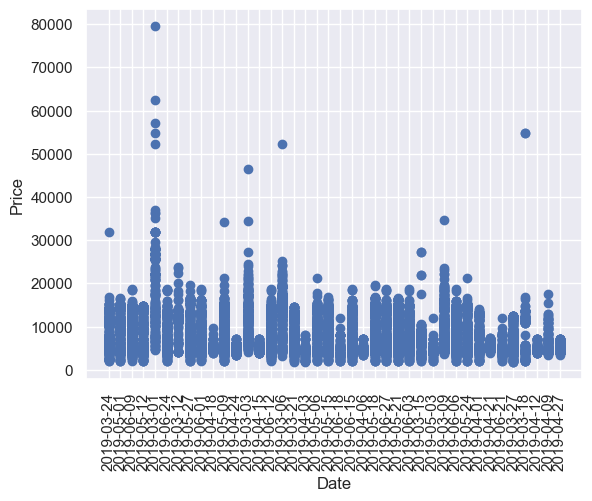

In [52]:
plt.scatter(df['dates'],df['price'], label=df['source_destination']);
plt.xticks(rotation=90);
plt.xlabel('Date')
plt.ylabel('Price')

Kind of sinusoidal, I wonder if that has anything to do with weekends. Without the outliers I think it would be easier to see. I will cut off the outliers which reach about 80k)

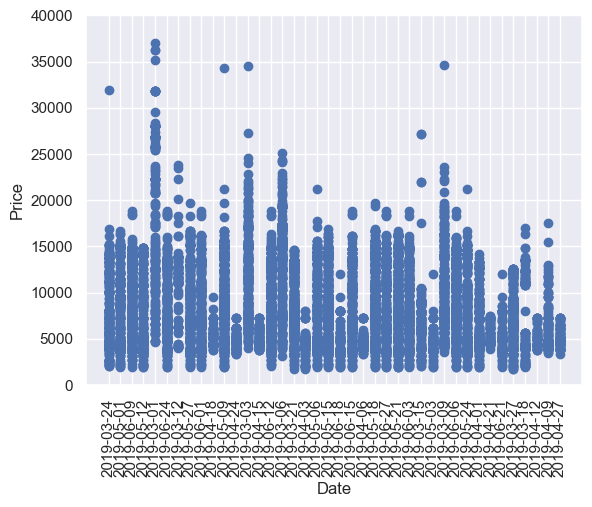

In [53]:
plt.scatter(df['dates'],df['price']);
plt.xticks(rotation=90);
plt.xlabel('Date')
plt.ylabel('Price')
plt.ylim([0,40000]);

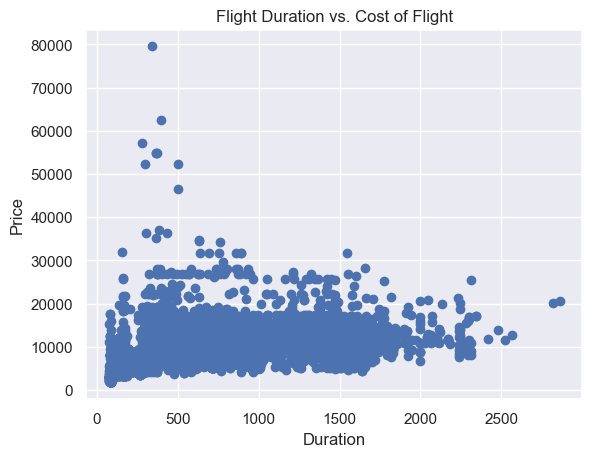

In [54]:
plt.scatter(df['duration_total'],df['price']);
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Flight Duration vs. Cost of Flight');

Wow, looks like there's no correlation between duration and cost. Really interesting.

array([[<Axes: title={'center': 'total_stops'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'duration_total'}>, <Axes: >]],
      dtype=object)

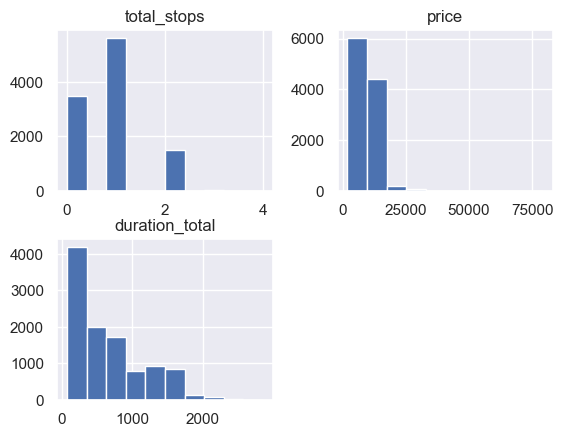

In [55]:
df.hist()

In [56]:
df_flights = pd.get_dummies(df['source_destination'], dtype=int)

In [57]:
df_flights.sum()

Banglore Delhi        1265
Banglore New Delhi     932
Chennai Kolkata        381
Delhi Cochin          4537
Kolkata Banglore      2871
Mumbai Hyderabad       697
dtype: int64

In [58]:
flights =  pd.concat([df, df_flights],axis=1)

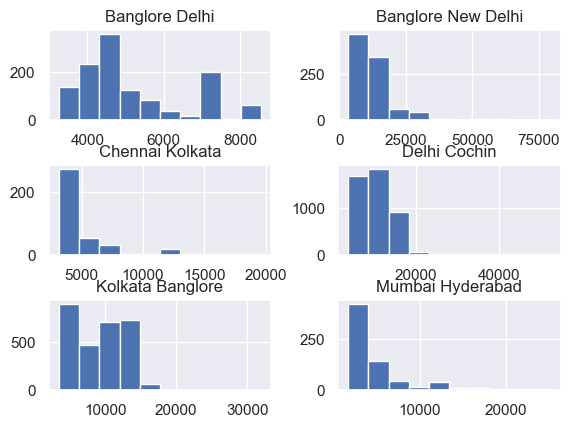

In [59]:
flights.hist('price', by='source_destination',xrot=0);

<Axes: xlabel='duration_total', ylabel='price'>

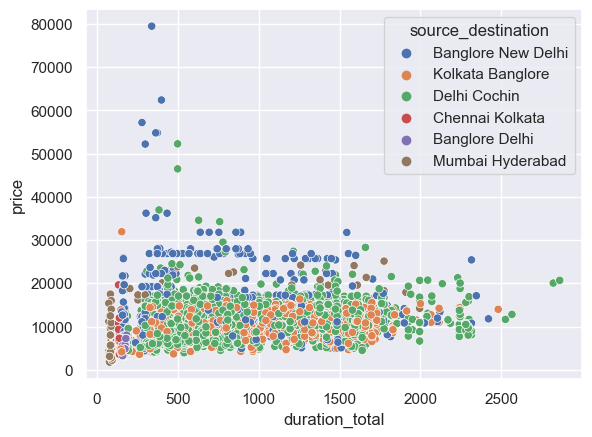

In [74]:
#fig, ax = plt.subplots(figsize=(10,10))
#bp = flights.groupby('source_destination')['price'].plot(kind='line', ax=ax)
sns.scatterplot(x='duration_total',y = 'price', data = df, hue= 'source_destination')


In [61]:
df.head()

,airline,total_stops,price,duration_total,source_destination,dates,dep_time,arrival_time
0,IndiGo,0,3897,170,Banglore New Delhi,2019-03-24,22:20:00,01:10:00
1,Air India,2,7662,445,Kolkata Banglore,2019-05-01,05:50:00,13:15:00
2,Jet Airways,2,13882,1140,Delhi Cochin,2019-06-09,09:25:00,04:25:00
3,IndiGo,1,6218,325,Kolkata Banglore,2019-05-12,18:05:00,23:30:00
4,IndiGo,1,13302,285,Banglore New Delhi,2019-03-01,16:50:00,21:35:00


Assuming Duration and Distance are somewhat proportionate:

In [62]:
df.sort_values(by='duration_total')

,airline,total_stops,price,duration_total,source_destination,dates,dep_time,arrival_time
9450,Air India,0,4307,75,Mumbai Hyderabad,2019-03-12,19:30:00,20:45:00
4845,Air India,0,2575,75,Mumbai Hyderabad,2019-03-21,19:30:00,20:45:00
844,Air India,0,3625,75,Mumbai Hyderabad,2019-05-24,19:30:00,20:45:00
4806,Air India,0,2050,75,Mumbai Hyderabad,2019-04-03,19:30:00,20:45:00
3708,Air India,0,3100,75,Mumbai Hyderabad,2019-05-01,19:30:00,20:45:00
...,...,...,...,...,...,...,...,...
7906,Air India,2,13990,2480,Kolkata Banglore,2019-03-24,05:55:00,23:15:00
5953,Jet Airways,2,11664,2525,Delhi Cochin,2019-03-21,10:20:00,04:25:00
8409,Jet Airways,2,12819,2565,Delhi Cochin,2019-03-21,09:40:00,04:25:00
1067,Jet Airways,2,20064,2820,Delhi Cochin,2019-03-03,05:25:00,04:25:00


In [67]:
ex = df[df['source_destination']=='Mumbai Hyderabad']

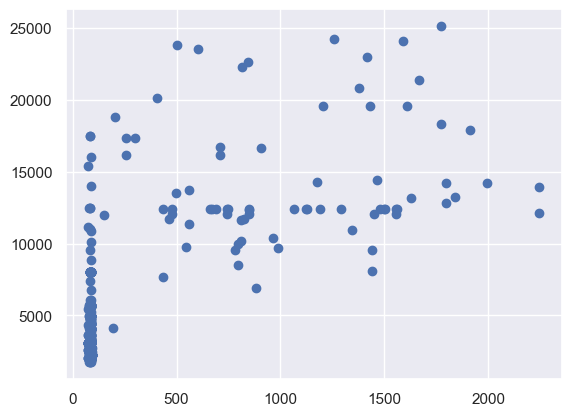

In [69]:
plt.scatter(ex['duration_total'],ex['price'])

#### Null Hypothesis: 

Long flights (longer duration) do not cost more than short duration flights.

In [89]:
long_flights = df[df['duration_total']>=1000]
short_flights = df[df['duration_total']<1000]

In [90]:
len(long_flights),len(short_flights) 

(2451, 8232)

In [91]:
long_flights_mean = long_flights['price'].mean()
short_flights_mean = short_flights['price'].mean()

In [80]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [81]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [82]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [92]:
# Compute difference of mean impact force from experiment: empirical_diff_means
diff_means = diff_of_means(short_flights['price'],long_flights['price'])


# Compute mean of pooled data: mean_count
group_mean = np.mean(np.concatenate((short_flights['price'],long_flights['price'])))

In [93]:
# Shift data sets
short_shifted = short_flights['price'] - short_flights_mean + group_mean
long_shifted = long_flights['price'] - long_flights_mean + group_mean

In [94]:
# Generate bootstrap replicates
rand_single = draw_bs_reps(short_shifted,
                       np.mean, size=10000)
rand_multi = draw_bs_reps(long_shifted,
                       np.mean, size=10000)

In [95]:
# Get replicates of difference of means: bs_replicates
bs_diff_means = rand_single - rand_multi

In [99]:
# Compute and print p-value: p
p = np.sum(bs_diff_means <= diff_means) / len(bs_diff_means)
print('p-value =', p)

p-value = 0.0


The P-value is below our critical value of 0.05, so we accept the null hypthesis that flight duration does not significantly affect the cost of the flight.